In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')


Verisetimizi y√ºkl√ºyoruz

In [2]:
path="laptopPrice.csv"
data=pd.read_csv(path)


Verisetimizi ke≈üif i√ßin bir fonksiyon ve sonra √ßalƒ±≈ütƒ±rƒ±yoruz

In [3]:
def explore_dataset(df):
    print("\n" + "="*50)
    print(f"üìä Dataset Overview")
    print("="*50)

    print(f"\nüîπ Shape: {df.shape}")
    print("\nüîπ Column Types:")
    print(df.dtypes)

    print("\nüîπ Missing Values:")
    print(df.isnull().sum())

    print("\nüîπ General Info:")
    print(df.info())

    print("\nüîπ Statistical Summary:")
    print(tabulate(df.describe(), headers='keys', tablefmt='grid'))

    print("\nüîπ First 5 Rows:")
    print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

    print("\nüîπ Last 5 Rows:")
    print(tabulate(df.tail(), headers='keys', tablefmt='fancy_grid'))

    print("="*50)


In [4]:
explore_dataset(data)


üìä Dataset Overview

üîπ Shape: (823, 19)

üîπ Column Types:
brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

üîπ Missing Values:
brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                

Null deƒüerimiz yok gibi g√∂z√ºk√ºyor. Bunun yanƒ±sƒ±ra bazƒ± s√ºtunlar aslƒ±nda n√ºmerik veri olarak kullanƒ±labilir. A≈üaƒüƒ±da bazƒ± s√ºtunlarƒ± n√ºmerik veriye √ßevirdim. Bazƒ±larƒ±nƒ±n adƒ±nƒ± deƒüi≈ütirdim daha rahat i≈ülem yapabilmek i√ßin

In [5]:
data['ram_gb'] = data['ram_gb'].str.replace('GB', '').astype(int)
data['ssd']= data['ssd'].str.replace('GB', '').astype(int)
data['hdd']= data['hdd'].str.replace('GB', '').astype(int)
data['graphic_card_gb']= data['graphic_card_gb'].str.replace('GB', '').astype(int)
data['rating'] = data['rating'].str.replace(r'\D', '', regex=True).astype(int)
data['warranty']=data['warranty'].str.replace('No warranty','0')
data['warranty']=data['warranty'].str.replace(r'\D','',regex=True).astype(int)

data['num_ratings']=data['Number of Ratings']
data['num_reviews']=data['Number of Reviews']
data=data.drop(columns=['Number of Ratings','Number of Reviews'])




Kontrol ediyoruz yaptƒ±ƒüƒ±mƒ±z deƒüi≈üiklikleri

In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   brand            823 non-null    object
 1   processor_brand  823 non-null    object
 2   processor_name   823 non-null    object
 3   processor_gnrtn  823 non-null    object
 4   ram_gb           823 non-null    int64 
 5   ram_type         823 non-null    object
 6   ssd              823 non-null    int64 
 7   hdd              823 non-null    int64 
 8   os               823 non-null    object
 9   os_bit           823 non-null    object
 10  graphic_card_gb  823 non-null    int64 
 11  weight           823 non-null    object
 12  warranty         823 non-null    int64 
 13  Touchscreen      823 non-null    object
 14  msoffice         823 non-null    object
 15  Price            823 non-null    int64 
 16  rating           823 non-null    int64 
 17  num_ratings      823 non-null    in

ram_gb          ssd          hdd  graphic_card_gb    warranty  \
count  823.000000   823.000000   823.000000       823.000000  823.000000   
mean     8.680437   452.121507   227.071689         1.190765    0.721750   
std      4.372408   316.662592   413.105282         2.026902    0.593231   
min      4.000000     0.000000     0.000000         0.000000    0.000000   
25%      4.000000   256.000000     0.000000         0.000000    0.000000   
50%      8.000000   512.000000     0.000000         0.000000    1.000000   
75%      8.000000   512.000000     0.000000         2.000000    1.000000   
max     32.000000  3072.000000  2048.000000         8.000000    3.000000   

               Price      rating   num_ratings  num_reviews  
count     823.000000  823.000000    823.000000   823.000000  
mean    76745.177400    3.562576    315.301337    37.609964  
std     45101.790525    0.567282   1047.382654   121.728017  
min     16990.000000    1.000000      0.000000     0.000000  
25%     46095.000000    3.000000      0.000000     0.000000  
50%     64990.000000    4.000000     17.000000     2.000000  
75%     89636.000000    4.000000    139.500000    18.000000  
max    441990.000000    5.000000  15279.000000  1947.000000

SSD HDD gibi deƒüerler  sƒ±fƒ±r olamaz. En azƒ±ndan birini mode deƒüeriyle dolduracak fonksiyon yazƒ±yorum.

In [7]:
def replace_zero_with_mode_randomly(row):
    if row['ssd'] == 0 and row['hdd'] == 0:
      column_choice = np.random.choice(['ssd', 'hdd'])
      if column_choice == 'ssd':
        row['ssd'] = data['ssd'].mode()[0]
      else:
        row['hdd'] = data['hdd'].mode()[0]
    return row

data=data.apply(replace_zero_with_mode_randomly,axis=1)

#Cleaned datayƒ± burada yedekliyoruz.
data_cleaned=data.copy()


Price ile deƒüi≈ükenler arasƒ±nda ili≈ükiyi inceliyoruz.

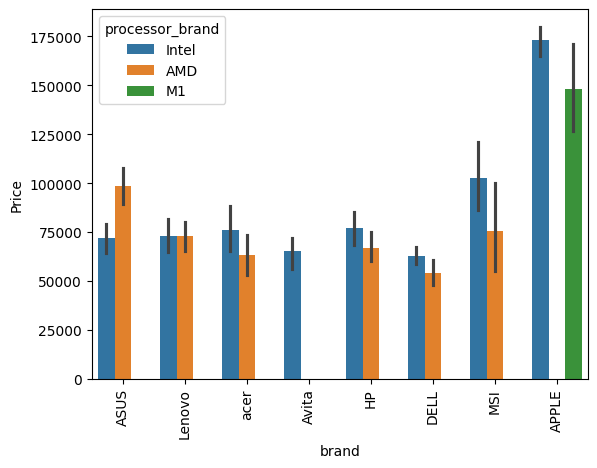

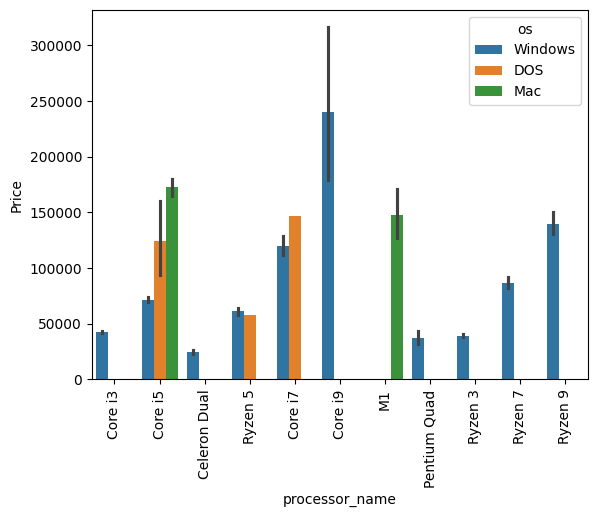

([0, 1, 2],
 [Text(0, 0, 'Casual'), Text(1, 0, 'ThinNlight'), Text(2, 0, 'Gaming')])

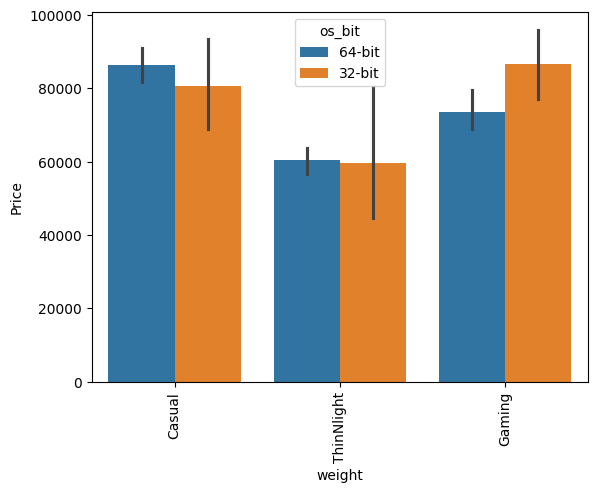

In [8]:
sns.barplot(data=data_cleaned,x='brand',y='Price',hue='processor_brand')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=data_cleaned,x='processor_name',y='Price',hue='os')
plt.xticks(rotation=90)
plt.show()

sns.barplot(data=data_cleaned,x='weight',y='Price',hue='os_bit')
plt.xticks(rotation=90)

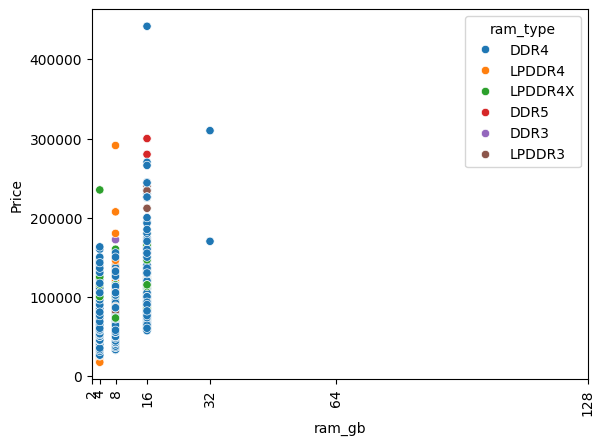

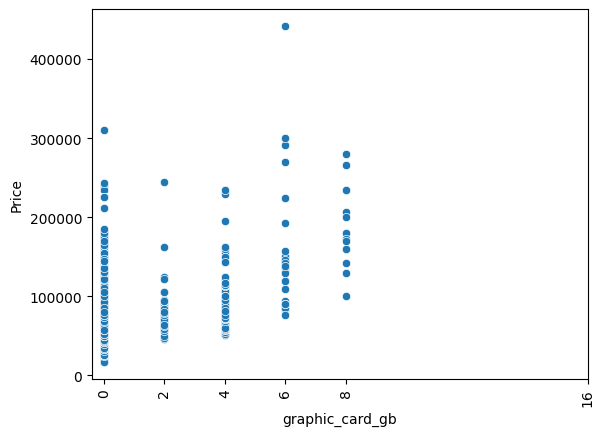

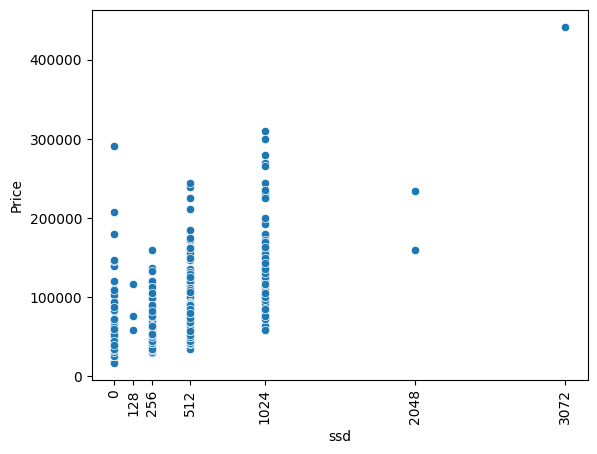

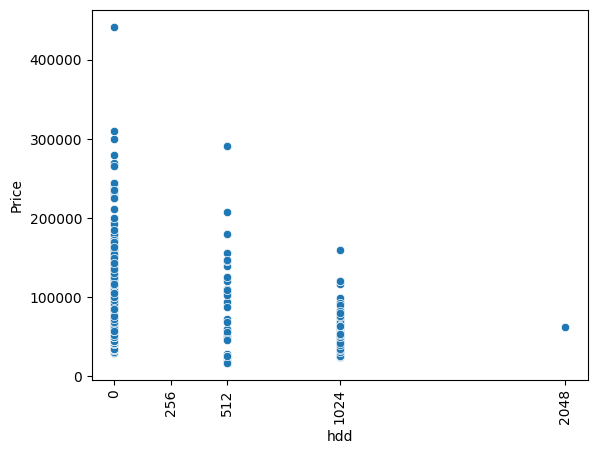

In [9]:

ram_values=[2,4,8,16,32,64,128]

sns.scatterplot(data=data_cleaned,x='ram_gb',y='Price',hue='ram_type',)
plt.xticks(ram_values, ram_values)
plt.xticks(rotation=90)
plt.show()


graphic_card_gb=[0,2,4,6,8,16]

sns.scatterplot(data=data_cleaned,x='graphic_card_gb',y='Price')
plt.xticks(graphic_card_gb, graphic_card_gb)
plt.xticks(rotation=90)
plt.show()


ssd_values=[0, 128, 256, 512, 1024, 2048, 3072]
sns.scatterplot(data=data_cleaned,x='ssd',y='Price')
plt.xticks(ssd_values, ssd_values)
plt.xticks(rotation=90)
plt.show()

hdd_values=[0, 256, 512, 1024, 2048]
sns.scatterplot(data=data_cleaned,x='hdd',y='Price')
plt.xticks(hdd_values, hdd_values)
plt.xticks(rotation=90)
plt.show()

Sayƒ±sal deƒüi≈ükenlerimizin daƒüƒ±lƒ±mƒ±nƒ± inceliyoruz

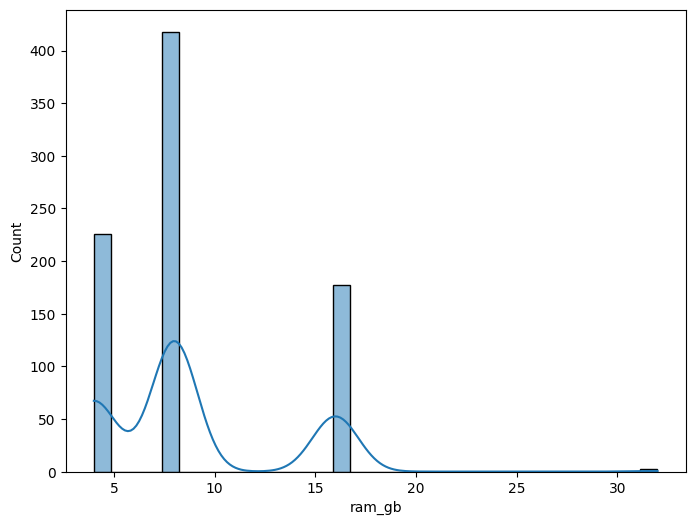

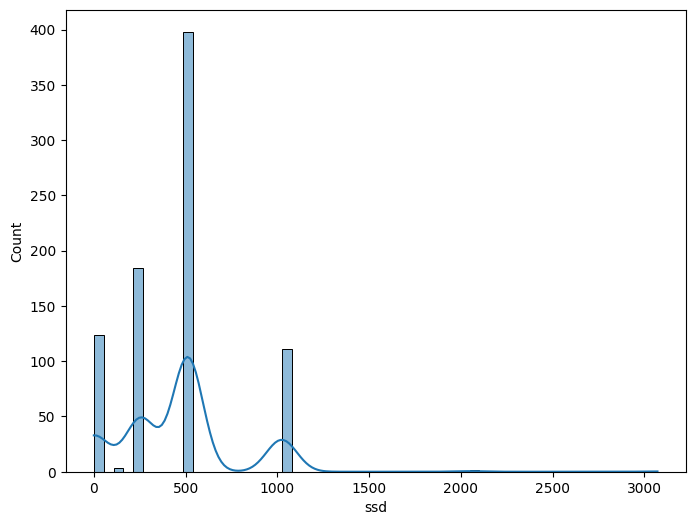

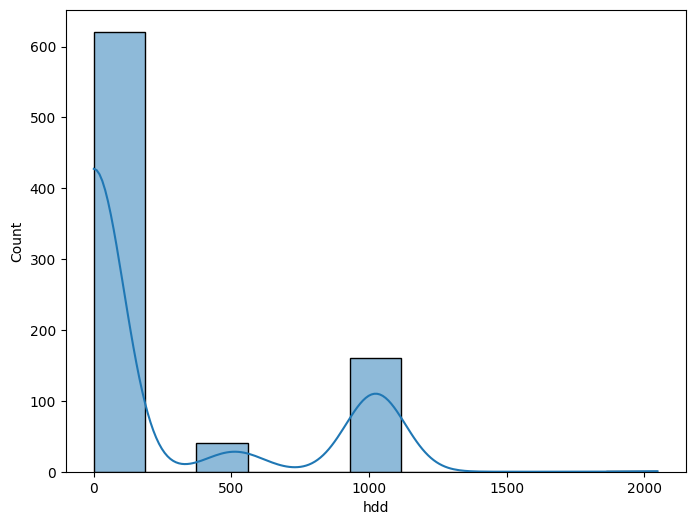

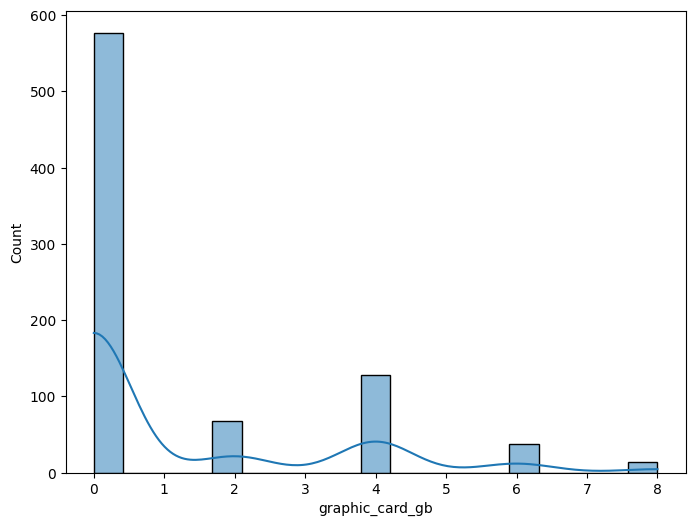

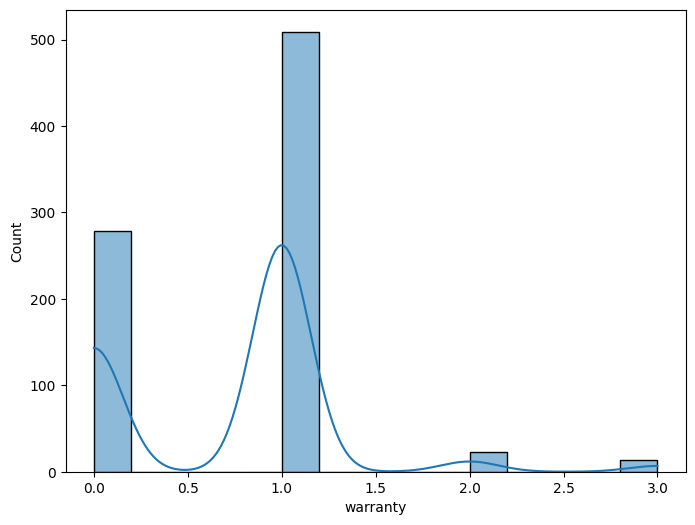

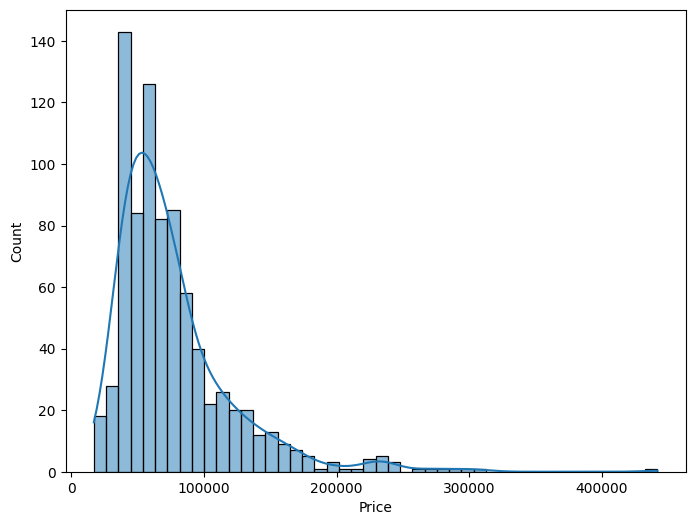

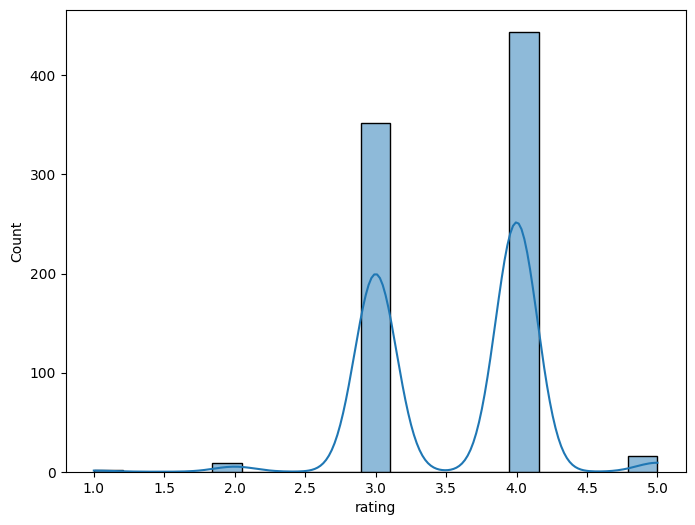

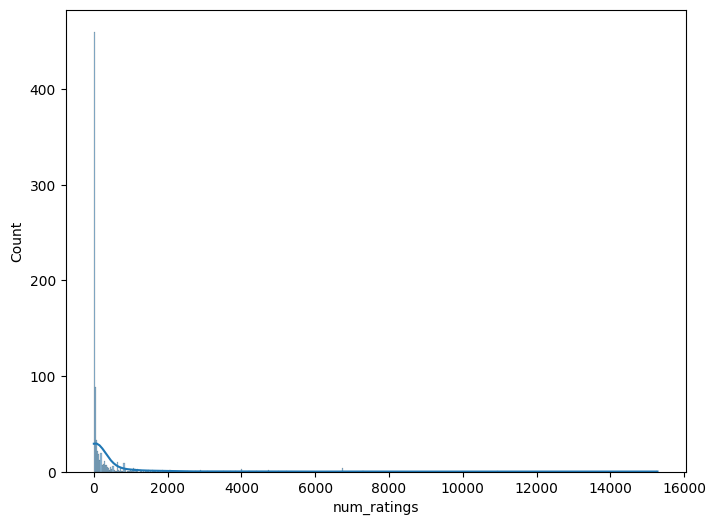

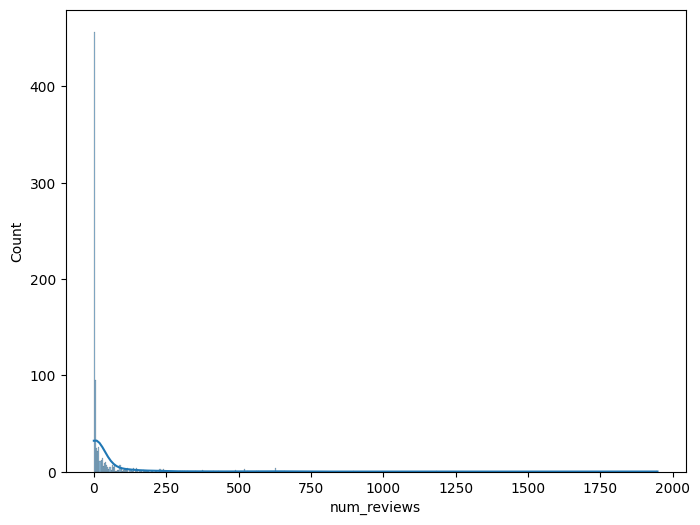

In [10]:
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)

N√ºmerik deƒüi≈ükenlerimizden Outlierlar deƒüerleri temizleyip minmax scale ile normalize ediyoruz.

In [11]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df[column]

for col in numerical_columns:
    data[col] = handle_outliers(data, col)





data[numerical_columns] = np.log1p(data[numerical_columns])



Geride kalan  kategorik s√ºtunlara encoding i≈ülemleri yapmak i√ßin e≈üsiz deƒüerlerine bakalƒ±m

In [12]:
categorical_columns = data.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())

Unique values in brand:
['ASUS' 'Lenovo' 'acer' 'Avita' 'HP' 'DELL' 'MSI' 'APPLE']
Unique values in processor_brand:
['Intel' 'AMD' 'M1']
Unique values in processor_name:
['Core i3' 'Core i5' 'Celeron Dual' 'Ryzen 5' 'Core i7' 'Core i9' 'M1'
 'Pentium Quad' 'Ryzen 3' 'Ryzen 7' 'Ryzen 9']
Unique values in processor_gnrtn:
['10th' 'Not Available' '11th' '7th' '8th' '9th' '4th' '12th']
Unique values in ram_type:
['DDR4' 'LPDDR4' 'LPDDR4X' 'DDR5' 'DDR3' 'LPDDR3']
Unique values in os:
['Windows' 'DOS' 'Mac']
Unique values in os_bit:
['64-bit' '32-bit']
Unique values in weight:
['Casual' 'ThinNlight' 'Gaming']
Unique values in Touchscreen:
['No' 'Yes']
Unique values in msoffice:
['No' 'Yes']


ƒ∞≈ülemcilerin Nesilleri i√ßin bir label encoding ger√ßekle≈ütireceƒüim 'No Generation'ƒ± deƒüi≈ütirmek istediƒüimizden ne yapacaƒüƒ±mƒ±za karar vermek i√ßin 'No generation' g√∂z√ºken i≈ülemcilere bakƒ±yoruz. Ardƒ±ndan en √ßok g√∂z√ºken i≈ülemci tipine bakƒ±yoruz.

In [13]:
print("Not Available: ")
print(data.loc[data['processor_gnrtn'] == 'Not Available', 'processor_name'].unique())
print("-------------------------------------")
print(data.groupby('processor_gnrtn').size())
print("-------------------------------------------")
print(data.groupby('processor_gnrtn')['processor_name'].value_counts())



Not Available: 
['Celeron Dual' 'Core i5' 'Pentium Quad' 'Ryzen 3' 'Ryzen 5' 'Ryzen 7'
 'Ryzen 9']
-------------------------------------
processor_gnrtn
10th             204
11th             334
12th               3
4th                1
7th                9
8th               41
9th                6
Not Available    225
dtype: int64
-------------------------------------------
processor_gnrtn  processor_name
10th             Core i5            75
                 Core i3            65
                 Core i7            34
                 M1                 24
                 Ryzen 5             4
                 Core i9             2
11th             Core i5           176
                 Core i3            96
                 Core i7            57
                 Core i9             5
12th             Core i7             2
                 Core i9             1
4th              Core i5             1
7th              Core i5             7
                 Core i3             2
8th  

Bu edindiƒüim bilgiler g√∂re i≈ülemci nesillerini ≈üu ≈üekilde encode etmek istiyorum. Kodda g√∂rebileceƒüiniz gibi her amd i≈ülemciyi intel kar≈üƒ±lƒ±ƒüƒ±ndaki en √ßok deƒüerle e≈üle≈ütiriyorum. Bunu yapmamƒ±n sebebi intelden daha eski nesil isimlerine sahip olmalarƒ±na raƒümen amd i≈ülemciler benzer d√ºzeyde g√º√ß d√ºzeyine sahipler. Celeron Pentium gibi i≈ülemcileri eski nesillerle ili≈ükilendirmem daha doƒüru olur.

---
R3: i3 ‚ûî 10

R5: i5 ‚ûî 10

R7: i7 ‚ûî 11

R9: i9 ‚ûî 11

Celeron/Pentium ‚ûî 8

---





In [14]:
# Sayƒ±sal nesil bilgilerini √ßƒ±kart
data["processor_gnrtn"] = data["processor_gnrtn"].str.extract('(\d+)').astype(float)

# Ryzen ve Intel nesillerini e≈üle≈ütiren fonksiyon
def assign_generation(row):
    if pd.isna(row["processor_gnrtn"]):  # Eƒüer nesil bilgisi yoksa
        if "Ryzen 3" in row["processor_name"]:
            return 10  # Core i3 teknolojisine yakƒ±n
        elif "Ryzen 5" in row["processor_name"]:
            return 10  # Core i5 teknolojisine yakƒ±n
        elif "Ryzen 7" in row["processor_name"]:
            return 11  # Core i7 teknolojisine yakƒ±n
        elif "Ryzen 9" in row["processor_name"]:
            return 11  # Core i9 teknolojisine yakƒ±n
        elif "Celeron Dual" in row["processor_name"]:
            return 8  # Giri≈ü seviyesi i≈ülemciler genelde eski
        elif "Pentium Quad" in row["processor_name"]:
            return 8  # Pentium'lar biraz daha g√ºncel olabilir
        elif "Core i5" in row["processor_name"]:
            return 10  # Eƒüer Core i5 olup nesli yoksa, genellikle 8th nesil
        else:
            return data["processor_gnrtn"].mode()[0]  # Kalan t√ºm durumlarda ortanca deƒüeri kullan
    return row["processor_gnrtn"]

data["processor_gnrtn"] = data.apply(assign_generation, axis=1)

print(data["processor_gnrtn"].unique())




data["processor_gnrtn"]=np.log1p(data["processor_gnrtn"])




[10.  8. 11.  7.  9.  4. 12.]


Geri kalan kategorik deƒüi≈ükenlerin encoding i≈ülemlerini yapƒ±yoruz

In [15]:

one_hot_encoded_cols = ["brand", "processor_name","ram_type","processor_brand", "weight"]

for col in one_hot_encoded_cols:
    encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False ile dense matris elde edilir.
    encoded_data = encoder.fit_transform(data[[col]])  # Veriyi encode et
    # Yeni s√ºtunlarƒ± data'ya ekleyelim
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))  # Yeni s√ºtun isimleri
    data = pd.concat([data, encoded_df], axis=1)  # Yeni s√ºtunlarƒ± birle≈ütirme
    data = data.drop(columns=[col])  # Orijinal kategorik s√ºtunu silebiliriz

label_encoded_cols = ["os_bit", "Touchscreen", "msoffice", "os"]

for col in label_encoded_cols:
    encoder = LabelEncoder()
    data[col] = encoder.fit_transform(data[col])

≈ûimdi  veri setimize tekrar bakƒ±yoruz yapƒ±lan encoding i≈ülemleri sonrasƒ±.

In [16]:
explore_dataset(data)


üìä Dataset Overview

üîπ Shape: (823, 45)

üîπ Column Types:
processor_gnrtn                float64
ram_gb                         float64
ssd                            float64
hdd                            float64
os                               int64
os_bit                           int64
graphic_card_gb                float64
warranty                       float64
Touchscreen                      int64
msoffice                         int64
Price                          float64
rating                         float64
num_ratings                    float64
num_reviews                    float64
brand_APPLE                    float64
brand_ASUS                     float64
brand_Avita                    float64
brand_DELL                     float64
brand_HP                       float64
brand_Lenovo                   float64
brand_MSI                      float64
brand_acer                     float64
processor_name_Celeron Dual    float64
processor_name_Core i3         float6

Verisetimizi uygun ≈üekilde b√∂l√ºyoruz

In [17]:
features=data.drop(columns=['Price'])
target=data['Price']

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

Modelimize sokuyoruz veri setimizi.

In [18]:
Lr=LinearRegression()
Lr.fit(X_train,y_train)

lr_pred=Lr.predict(X_test)

Metriklere bakƒ±yoruz

In [19]:
r2=r2_score(y_test,lr_pred)
mse=mean_squared_error(y_test,lr_pred)
rmse=np.sqrt(mse)

print("R2: ",r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.8207123665055842
MSE:  0.03502772146064149
RMSE:  0.18715694339415112


Ridge ile modelimizi r2 skorunu  arttƒ±rmaya √ßalƒ±≈üƒ±yoruz

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge regresyon modeli
ridge_params = {'alpha': np.logspace(-3, 3, 50)}  # Alpha deƒüerleri i√ßin geni≈ü bir aralƒ±k
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)  # √áapraz doƒürulama ile en iyi alpha deƒüerini bulma
ridge_grid.fit(X_train, y_train)

# En iyi Ridge modeli
best_ridge = ridge_grid.best_estimator_

# Ridge katsayƒ±larƒ±nƒ± alma
ridge_coefficients = best_ridge.coef_

# Test setinde tahmin yapma
y_pred_ridge = best_ridge.predict(X_test)

# Performans deƒüerlendirmesi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_best_alpha = ridge_grid.best_params_['alpha']

# Sonu√ßlarƒ± yazdƒ±r
print(f"Ridge Modeli (En iyi Alpha: {ridge_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R^2 Skoru: {r2_ridge}")
print("Ridge Katsayƒ±larƒ±:", ridge_coefficients)

Ridge Modeli (En iyi Alpha: 0.28117686979742307):
Mean Squared Error (MSE): 0.03490208802960187
R^2 Skoru: 0.8213554149140907
Ridge Katsayƒ±larƒ±: [ 0.08068244  0.07642064  0.01863466  0.         -0.18622708 -0.01473649
  0.12650282  0.03566093  0.20230628 -0.0399317   0.10355047 -0.07195033
  0.06096069  0.48808858 -0.09095909 -0.16373972 -0.04448628  0.00887315
 -0.05077901 -0.09354772 -0.05344991 -0.62358306 -0.21024513  0.1356368
  0.40786114  0.60200812  0.01390118 -0.38089687 -0.43641036 -0.11764936
  0.11625365  0.49312388  0.05085041 -0.17576472  0.10533813  0.2135442
 -0.12328755 -0.07068047  0.06864249 -0.08254367  0.01390118  0.0300003
 -0.07060226  0.04060196]


Lasso Deniyoruz

In [21]:
from sklearn.linear_model import Lasso
# Lasso regresyon modeli
lasso_params = {'alpha': np.logspace(-3, 0, 50)}  # Lasso i√ßin daha k√º√ß√ºk bir alpha aralƒ±ƒüƒ±
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)

# En iyi Lasso modeli
best_lasso = lasso_grid.best_estimator_

# Lasso katsayƒ±larƒ±nƒ± alma
lasso_coefficients = best_lasso.coef_

# Test setinde tahmin yapma
y_pred_lasso = best_lasso.predict(X_test)

# Performans deƒüerlendirmesi
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
lasso_best_alpha = lasso_grid.best_params_['alpha']

# Sonu√ßlarƒ± yazdƒ±r
print(f"Lasso Modeli (En iyi Alpha: {lasso_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R^2 Skoru: {r2_lasso}")
print("Lasso Katsayƒ±larƒ±:", lasso_coefficients)


Lasso Modeli (En iyi Alpha: 0.001):
Mean Squared Error (MSE): 0.03308917091457456
R^2 Skoru: 0.8306347401376851
Lasso Katsayƒ±larƒ±: [ 0.          0.09088719  0.02363019  0.         -0.17061404 -0.0023364
  0.13187509  0.02636816  0.18885663 -0.0224393   0.         -0.06079743
  0.04584905  0.51797641 -0.02777083 -0.06481268  0.          0.05215939
 -0.         -0.00805702  0.         -0.75255222 -0.32244372  0.
  0.25294982  0.38073152  0.         -0.46808715 -0.36737939 -0.08465333
  0.12340218  0.47083119  0.         -0.12881151  0.02370409  0.19969398
 -0.01995234 -0.          0.         -0.          0.          0.
 -0.08466007  0.        ]


En √ßok etki eden √∂zelliƒüe bakƒ±yoruz skorumuzu arttƒ±rmak i√ßin

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Modeli se√ß
model = Ridge()

# RFE uygulamasƒ±
rfe = RFE(model, n_features_to_select=5)  # Se√ßilecek √∂zellik sayƒ±sƒ±
fit = rfe.fit(X_test, y_test)

# Se√ßilen √∂zellikleri yazdƒ±r
selected_features = [column for column, support in zip(X_test, fit.support_) if support]
print("Selected Features:", selected_features)


Selected Features: ['processor_name_Celeron Dual', 'processor_name_Core i3', 'processor_name_Pentium Quad', 'processor_name_Ryzen 3', 'processor_name_Ryzen 9']


T√ºm n√ºmerik deƒüi≈ükenleri scaler kullanmak yerine logaritmik transformasyona uƒüratƒ±nca g√∂zle g√∂r√ºl√ºr 0.10 r2 puanƒ±na yakƒ±n bir artƒ±≈ü saƒülandƒ±. Base model 0.7'den 0.81'e √ßƒ±ktƒ±.

Skorun arttƒ±rƒ±lmasƒ± i√ßin eklenen √∂zellikler

In [23]:
data["proccessor_gen_ram_interaction"]=np.expm1(data["processor_gnrtn"])*np.expm1(data["ram_gb"])
data["proccessor_gen_ram_interaction"]=np.log1p(data["proccessor_gen_ram_interaction"])

data['processor_gpu_interaction'] = np.expm1(data['processor_gnrtn']) * np.expm1(data['graphic_card_gb'])
data['processor_gpu_interaction'] = np.log1p(data['processor_gpu_interaction'])

data['processor_ssd_interaction'] = np.expm1(data['processor_gnrtn']) * np.expm1(data['ssd'])
data['processor_ssd_interaction'] = np.log1p(data['processor_ssd_interaction'])

data['ssd_hdd_ratio'] = np.expm1(data['ssd']) / (np.expm1(data['hdd'])+1e-5)
data['ssd_hdd_ratio'] = np.log1p(data['ssd_hdd_ratio'])



Tekrar modellere sokuyoruz

In [24]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features=data.drop(columns=['Price'])
target=data['Price']

lr=LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)
lr.fit(X_train,y_train)

lr_pred=lr.predict(X_test)

r2=r2_score(y_test,lr_pred)
mse=mean_squared_error(y_test,lr_pred)
rmse=np.sqrt(mse)

print("R2: ",r2)
print("MSE: ",mse)
print("RMSE: ",rmse)

R2:  0.8414674266751939
MSE:  0.030972771030707967
RMSE:  0.17599082655271542


Ridge

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge regresyon modeli
ridge_params = {'alpha': np.logspace(-3, 3, 50)}  # Alpha deƒüerleri i√ßin geni≈ü bir aralƒ±k
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='r2', cv=5)  # √áapraz doƒürulama ile en iyi alpha deƒüerini bulma
ridge_grid.fit(X_train, y_train)

# En iyi Ridge modeli
best_ridge = ridge_grid.best_estimator_

# Ridge katsayƒ±larƒ±nƒ± alma
ridge_coefficients = best_ridge.coef_

# Test setinde tahmin yapma
y_pred_ridge = best_ridge.predict(X_test)

# Performans deƒüerlendirmesi
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
ridge_best_alpha = ridge_grid.best_params_['alpha']

# Sonu√ßlarƒ± yazdƒ±r
print(f"Ridge Modeli (En iyi Alpha: {ridge_best_alpha}):")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R^2 Skoru: {r2_ridge}")
print("Ridge Katsayƒ±larƒ±:", ridge_coefficients)

Ridge Modeli (En iyi Alpha: 0.0017575106248547913):
Mean Squared Error (MSE): 0.03104653546407111
R^2 Skoru: 0.8410898671268632
Ridge Katsayƒ±larƒ±: [ 2.89088841  2.58214673  0.63075796  0.         -0.16614543 -0.00415283
  0.59082875  0.02654873  0.1951999  -0.03674948  0.1462301  -0.07528177
  0.06816066  0.43899691 -0.09002078 -0.16341589 -0.0104687   0.01336832
 -0.03864209 -0.10308271 -0.04673504 -0.59976264 -0.19395812  0.16915235
  0.37586226  0.51729181  0.03873684 -0.37015124 -0.41644974 -0.09861138
  0.12105822  0.45683162  0.06230319 -0.16671574  0.09405335  0.19134847
 -0.11002297 -0.07096629  0.04141409 -0.08015093  0.03873684  0.03542896
 -0.06521504  0.02978608 -2.22253844 -0.20180697 -0.56709867  0.05763371]


Modelimizi streamlit'de kullanmak √ºzere kaydediyoruz.

In [26]:
import joblib


model_path="streamlit_app/model.pkl"

joblib.dump(best_ridge, model_path)

import pickle


data_path = "streamlit_app/dataset.pkl"

with open(data_path, "wb") as f:
    pickle.dump(data, f)
